### Codio Activity 3.1: pandas Basics

This assignment focuses on the use of two pandas DataFrame methods -- `.isin()` and `query()`.  These methods are used to select rows and columns of a dataframe based on conditions.  To explore their use, we create a simple DataFrame with information on basketball players in a game, the number of points they score and number of minutes they play.

## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)


In [2]:
import pandas as pd

In [3]:
df = pd.DataFrame({'minutes':[30,35,40],
                  'points': [13,21,50],
                   'team': ['kninks','lakers','kninks']},
                   index = ['drose','lebron','kemba'])
df


,minutes,points,team
drose,30,13,kninks
lebron,35,21,lakers
kemba,40,50,kninks


### Problem 1

#### Passing a list of values

The DataFrame `df` has a method `.isin(values)` that will return a boolean based on the *values* argument which should be an iterable (lists, tuples, sets, series, dict).  

Use the `.isin()` function on `df` with argument equal to `[30, 21]` and save the resulting DataFrame to `ans_1` below.

In [5]:
ans_1 = df.isin([30,21])
ans_1

,minutes,points,team
drose,True,False,False
lebron,False,True,False
kemba,False,False,False


### Problem 2

#### Passing a dictionary of values

To pass a dictionary of values to the method, specify the column and values of interest.  For example

```python
df.isin({'team': ['knicks']})
```

Create a dictionary with keys equal to `points` and `minutes`  Set the values equal to `[13]` for both keys. Assign this dictionary to the variable `values`.

Use the `.isin()` function on `df` with argument equal to `values` and save the resulting DataFrame to `ans_2` below.

In [7]:
values = {'points':[13],'minutes':[13]}
ans_2 = df.isin(values)
ans_2

,minutes,points,team
drose,False,True,False
lebron,False,False,False
kemba,False,False,False


### Problem 3

#### Using the `.query()` method

The `query()` method is used on a DataFrame to querying its columns. This method returns a  boolean expression. 

For example, to return the players who scored more than 20 points pass a string expression `points > 20` to the `query()` method:

In [9]:
df.query(df['points']> 20)

ValueError: expr must be a string to be evaluated, <class 'pandas.core.series.Series'> given

In [13]:
df.query('points' > 20)

TypeError: '>' not supported between instances of 'str' and 'int'

In [12]:
df.query('points > 20')

,minutes,points,team
lebron,35,21,lakers
kemba,40,50,kninks


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, drose to kemba
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   minutes  3 non-null      int64 
 1   points   3 non-null      int64 
 2   team     3 non-null      object
dtypes: int64(2), object(1)
memory usage: 96.0+ bytes


Use the `.query()` method on `df` to select all players who played more than 30 minutes. 

Assign the resulting DataFrame to `ans_3` below.

In [15]:
ans_3 = df.query('minutes > 30')
ans_3

,minutes,points,team
lebron,35,21,lakers
kemba,40,50,kninks


### Problem 4

#### Passing multiple conditions to the `.query()` method.

To combine expressions the `.query` method joins arguments using `and` and `or` as a single string. 


For example, to return the players who scored more than 20 points and played less than 50 minutes pass a string expression `points > 20 and minutes < 50 ` to the `query()` method:


In [16]:
df.query('points > 20 and minutes < 50')

,minutes,points,team
lebron,35,21,lakers
kemba,40,50,kninks


Use the `.query` method on `df` to create a DataFrame with players who played more than 30 minutes and scored more than 25 points.  Save your resulting DataFrame to `ans_4` below.

In [17]:
ans_4 = df.query('minutes > 30 and points > 25')
ans_4

,minutes,points,team
kemba,40,50,kninks


### Problem 5

#### Using a string method to query 

To use object methods from the base python installations, use the name of the column, followed by the appropriate datatype constructor and subsequent method. 

When using a Python method, the `engine` argument must be specified.The code below shows how to select teams that contain the letter `k`:

In [20]:
df.query("minutes > 30 and points > 25")

,minutes,points,team
kemba,40,50,kninks


In [26]:
df[(df['minutes'] > 30) & (df['points'] > 25)]

,minutes,points,team
kemba,40,50,kninks


In [21]:
df

,minutes,points,team
drose,30,13,kninks
lebron,35,21,lakers
kemba,40,50,kninks


In [22]:
df.query('team.str.contains("k")')

,minutes,points,team
drose,30,13,kninks
lebron,35,21,lakers
kemba,40,50,kninks


In [23]:
df.query('team.str.contains("k")', engine = 'python')

,minutes,points,team
drose,30,13,kninks
lebron,35,21,lakers
kemba,40,50,kninks


In [25]:
df[df['team'].str.contains('k')]


,minutes,points,team
drose,30,13,kninks
lebron,35,21,lakers
kemba,40,50,kninks


Use the string method `startswith` to select all rows where the team starts with the letter `k`.  Assign your solution to `ans_5` below.

In [28]:
ans_5 = df.query('team.str.startswith("k")')
ans_5
                 

,minutes,points,team
drose,30,13,kninks
kemba,40,50,kninks


### Codio Activity 3.2: The Basics of Data Visualization

This assignment is meant to review basic plots with three popular plotting libraries.  The libraries are loaded below, and the titanic data seen in the last module is used as the dataset. 

## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)
- [Problem 5](#Problem-5)
- [Problem 6](#Problem-6)
- [Problem 7](#Problem-7)
- [Problem 8](#Problem-8)

In [29]:
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
titanic = sns.load_dataset('titanic')

In [32]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [33]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


### Problem 1

**Bar Plot with `matplotlib`**

Create a barplot of the `class` column in the titanic data.  Use the following labels and title:

- `x axis`: Class of Tickets on Titanic
- `y axis`: Count 
- `title`: Count by Class on the Titanic

Save the image as `img1` in the `results` folder.

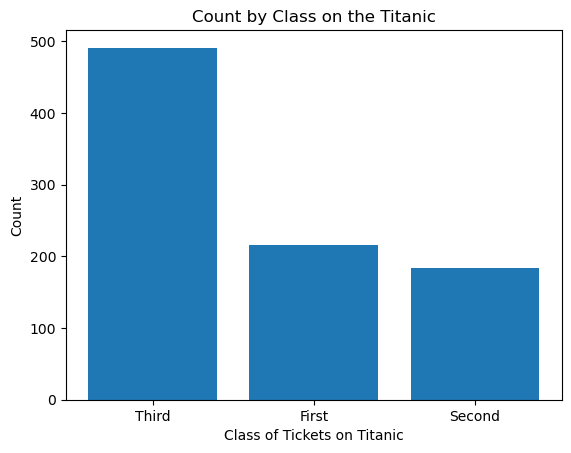

In [41]:
# unique() means class, and value_counts() means count
plt.bar(titanic['class'].unique(),titanic['class'].value_counts())
plt.title('Count by Class on the Titanic')
plt.xlabel('Class of Tickets on Titanic')
plt.ylabel('Count')
plt.savefig('results/img1.png')

### Problem 2

**Count Plot with `seaborn`**

Create a countplot of the `class` column in the titanic data.  Use the following labels and title:

- `x axis`: Class of Tickets on Titanic
- `y axis`: Count 
- `title`: Count by Class on the Titanic

Save the image as `img2` in the `results` folder.

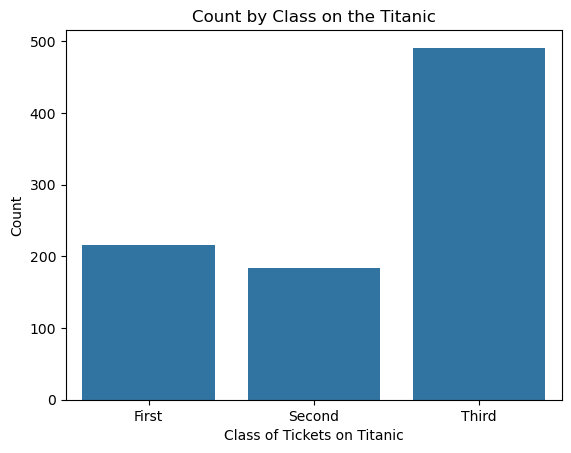

In [51]:
fig = sns.countplot(x='class', data = titanic)
plt.xlabel('Class of Tickets on Titanic')
plt.ylabel('Count')
plt.title('Count by Class on the Titanic')
plt.savefig('results/img2.png')

### Problem 3

#### Bar Plot with `plotly`

Create a barplot of the `class` column in the titanic data using .  Use the following labels and title:

- `x axis`: Class of Tickets on Titanic
- `y axis`: Count 
- `title`: Count by Class on the Titanic

Save the image as `img3` in the `results` folder.

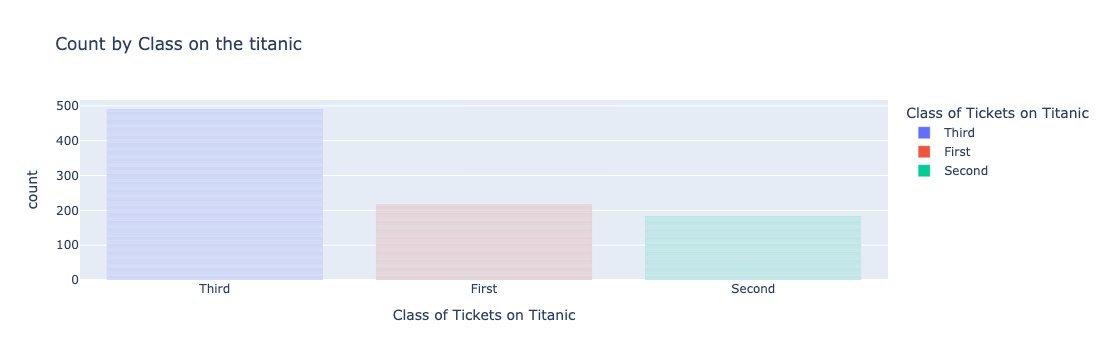

<Figure size 640x480 with 0 Axes>

In [61]:
fig3 = px.bar(titanic, x = 'class', title = 'Count by Class on the titanic', color = 'class', labels = {'class': 'Class of Tickets on Titanic'})
fig3.show()
plt.savefig('./results/img3.png')

### Problem 4

#### Histogram with `plotly`

Create a histogram of the fare column using `plotly`.  Use the `color_discrete_sequence` argument to change the default color, add a title `Histogram of Fares on the Titanic`, and an x-label `Fare`.

Save the image as `img4` in the `results` folder.

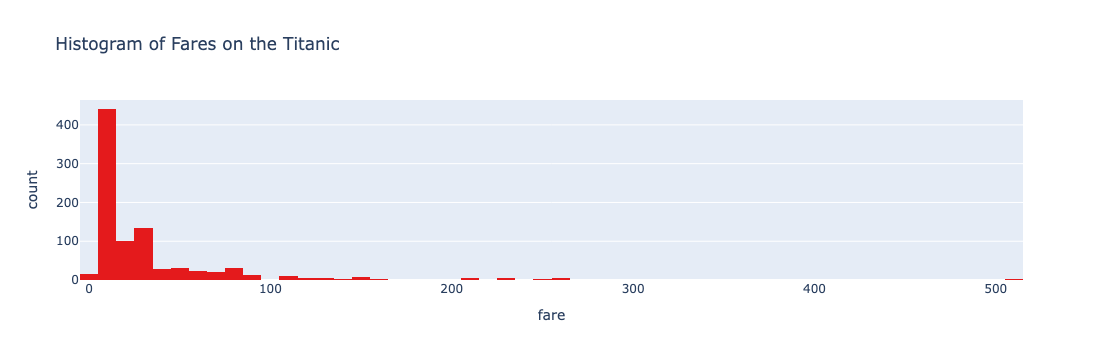

<Figure size 640x480 with 0 Axes>

In [62]:
fig4 = px.histogram(titanic, x ='fare', title = 'Histogram of Fares on the Titanic', color_discrete_sequence = px.colors.qualitative.Set1)
fig4.show()
plt.savefig('results/img4.png')

### Problem 5

#### Histogram by survived with `plotly`

By setting the `color` argument to a string representing a column name, plotly will split the data and draw a histogram for each unique category in the column.  Draw a histogram of the `age` column split on `survived`.  Add a title "Histogram of Ages by Survival", an x-label `Age`.

Save the image as `img5` in the `results` folder.

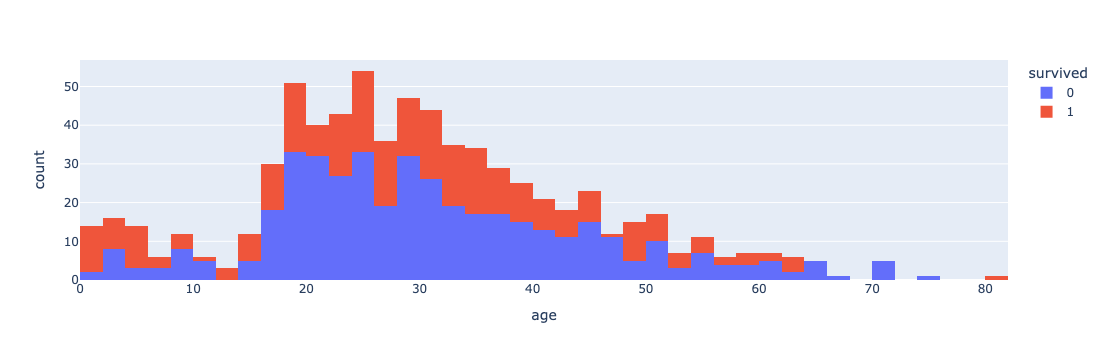

In [73]:
fig5 = px.histogram(titanic, x = 'age', color = 'survived')
fig5.show()
#plt.savefig('results/img5.png')
#fig5.write_image('results/img55.png')

### Codio Activity 3.3
### Replicating Plots 

This activity focuses on duplicating a given plot using the appropriate plotting library.  The `gapminder` dataset from plotly is used.  For each Problem, you will be shown an image of a plot produced using `matplotlib`, and `seaborn`.  You are asked to replicate the plot and enter the appropriate code for each Problem.  

## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)
- [Problem 4](#Problem-4)

In [65]:
import plotly.express as px
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
gapminder = px.data.gapminder()

In [67]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [68]:
gapminder.continent.unique()

array(['Asia', 'Europe', 'Africa', 'Americas', 'Oceania'], dtype=object)

In [69]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


### Problem 1

**Basic Histogram**

Use the `pandas` method `hist` to create a histogram plot of the column `lifeExp`. 

Set the title of your plot equal to `Histogram of Life Expentancy`.


Save your plot as a png file with the name `plot1.png` in the folder `images`.


![](images/np1.png)

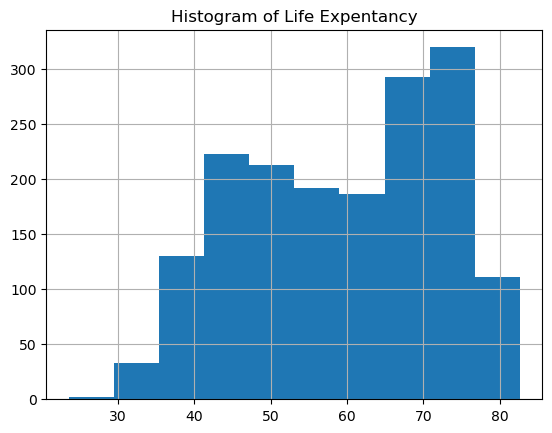

In [71]:
gapminder.hist('lifeExp')
plt.title('Histogram of Life Expentancy')
plt.savefig('images/plot1.png')

### Problem 2

**Boxplots**

Use `Seaborn` to create a boxplot of the `gapminder` dataframe. Sr the argument `x` equal to `lifeExp` and the variable `y` equal to `continent`.

Save your plot as a png file with the name `plot2.png` in the folder `images`.

![](images/np2.png)

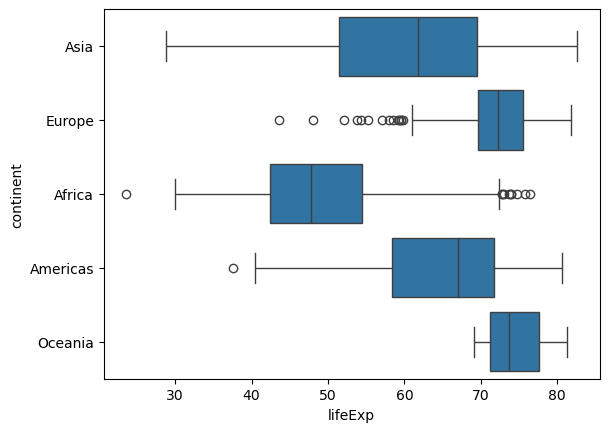

In [75]:
sns.boxplot(data = gapminder, x = 'lifeExp', y = 'continent')
plt.savefig('images/plot2.png')

### Problem 3

**Bar Plot**

Use `Seaborn` to create a barplot of the `gapminder` dataframe. Sr the argument `x` equal to `gdpPercap` and the variable `y` equal to `continent`.

Save your plot as a png file with the name `plot3.png` in the folder `images`.

![](images/p4.png)
 

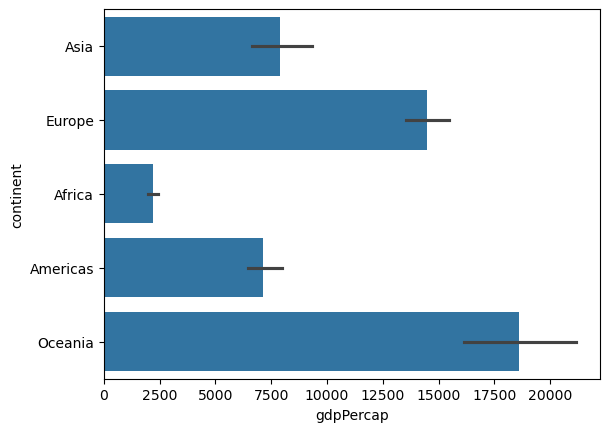

In [76]:
sns.barplot(data = gapminder, x ='gdpPercap', y = 'continent')
plt.savefig('images/plot3.png')

### Problem 4

**Scatterplot**

Use `Seaborn` to create a scatterplot of the `gapminder` dataframe. Sr the argument `x` equal to `gdpPercap` and the variable `y` equal to `lifeExp`.

Save your plot as a png file with the name `plot4.png` in the folder `images`.

![](images/np4.png)

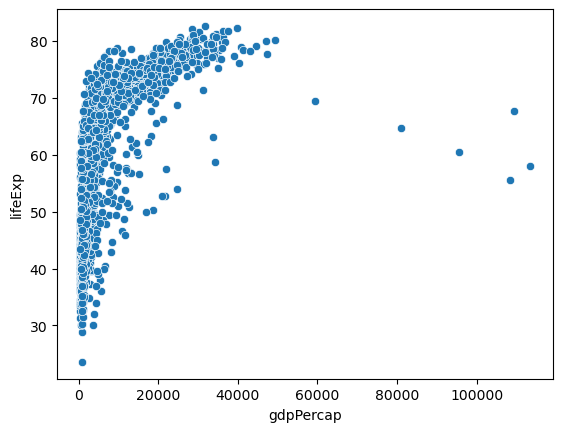

In [81]:
sns.scatterplot(data = gapminder, x ='gdpPercap', y = 'lifeExp')
plt.savefig('images/plot4.png')

### Codio Activity 3.4: Aggregation Operations

This activity focuses on using a DataFrame's `groupby` method.  As a reminder, this method allows aggregation by a category or condition in the DataFrame.  The dataset for the activity again is the gapminder dataset that comes from `plotly`.

## Index:

- [Problem 1](#Problem-1:-Average-Life-Expectancy-by-Year)
- [Problem 2](#Problem-2:-GDP-by-Continent)
- [Problem 3](#Problem-3:-Aggregating-with-multiple-functions)
- [Problem 4](#Problem-4:-Grouping-on-Numeric-Conditions)
- [Problem 5](#Problem-5:-Multiple-Grouping)

In [82]:
gapminder.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [83]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


### Problem 1: Average Life Expectancy by Year

Use the `groupby` method on the `gapminder` DataFrame to group the values in the `year` column. Use a double square bracket notation to apply this operation on the `lifeExp` column. Then, use the pandas function `mean()` to  compute the average value.

Assign your results as a DataFrame object to `ans1` below.

In [84]:
ans1 = gapminder.groupby('year')[['lifeExp']].mean()
ans1

,lifeExp
year,
1952,49.057620
1957,51.507401
1962,53.609249
1967,55.678290
1972,57.647386
1977,59.570157
1982,61.533197
1987,63.212613
1992,64.160338


### Problem 2: GDP by Continent

Use the `groupby` method on the `gapminder` DataFrame to group the values in the `continent` column. Use a double square bracket notation to apply this operation on the `gdpPercap` column. Then, use the pandas function `median()` to compute the median value.

Assign your response as a DataFrame to `ans2` below.

In [85]:
ans2 = gapminder.groupby('continent')[['gdpPercap']].median()
ans2

,gdpPercap
continent,
Africa,1192.138217
Americas,5465.509853
Asia,2646.786844
Europe,12081.749115
Oceania,17983.303955


### Problem 3: Aggregating with multiple functions

Use the `groupby` method on the `gapminder` DataFrame to group the values in the `continent` column. Use a double square bracket notation to apply this operation on the `gdpPercap` column. Then, use the pandas function `agg()` with argument equal to `['mean', 'median', 'std']` to compute the mean, the median, and the standard deviation.

Assign your solution to `ans3` below.

In [86]:
ans3 = gapminder.groupby('continent')[['gdpPercap']].agg(['mean','median','std'])
ans3
                                                         

gdpPercap                            
                   mean        median           std
continent                                          
Africa      2193.754578   1192.138217   2827.929863
Americas    7136.110356   5465.509853   6396.764112
Asia        7902.150428   2646.786844  14045.373112
Europe     14469.475533  12081.749115   9355.213498
Oceania    18621.609223  17983.303955   6358.983321

### Problem 4: Grouping on Numeric Conditions

Besides grouping on categorical features, a numeric condition can also be used to split the data. For example, group the countries based on their population and calculate the average life expectancy for each group. 

Use the `groupby` method on the `gapminder` DataFrame to group the entries for which the `pop` column is greater than `300_000_000`. Use a double square bracket notation to apply this operation on the `lifeExp` column. Then, use the pandas function `mean()` to compute the average value.


NOTE: This question should return two groups based on whether the population is greater than 300,000,000 (true) or not (false). In the next question, you will groupby multiple features.

In [90]:
# important groupby(df['col'] > 300)
gapminder.groupby(gapminder['pop'] > 300000000)[['lifeExp']].mean()

,lifeExp
pop,
False,59.491833
True,58.306267


### Problem 5: Multiple Grouping

Finally, a groupby can be called on a heirarchy of conditions.  The list of group categories should be passed in order of the grouping heirarchy.  For example:

```python
gapminder.groupby(['continent', 'country'])
```

would first group on the continent and then each country within the continent. 

Selects the rows from the DataFrame `gapminder` where the value in the `continent` column is either `Americas` or `Europe`. For this step, use the `.isin()` method to create a boolean mask. Assign this result to `ans5a`.

Use the `groupby` method on the `ans5a` DataFrame to group the entries in the columns `continent` and `country`. Use a double square bracket notation to apply this operation on the `lifeExp` column. Then, use the pandas function `mean()` to compute the average value.

In [91]:
ans5a = gapminder[gapminder['continent'].isin(['Americas','Europe'])]
ans5a

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
12,Albania,Europe,1952,55.230,1282697,1601.056136,ALB,8
13,Albania,Europe,1957,59.280,1476505,1942.284244,ALB,8
14,Albania,Europe,1962,64.820,1728137,2312.888958,ALB,8
15,Albania,Europe,1967,66.220,1984060,2760.196931,ALB,8
16,Albania,Europe,1972,67.690,2263554,3313.422188,ALB,8
...,...,...,...,...,...,...,...,...
1639,Venezuela,Americas,1987,70.190,17910182,9883.584648,VEN,862
1640,Venezuela,Americas,1992,71.150,20265563,10733.926310,VEN,862
1641,Venezuela,Americas,1997,72.146,22374398,10165.495180,VEN,862
1642,Venezuela,Americas,2002,72.766,24287670,8605.047831,VEN,862


In [93]:
ans5b = ans5a.groupby(['continent','country'])[['lifeExp']].mean()
ans5b

lifeExp
continent country                          
Americas  Argentina               69.060417
          Bolivia                 52.504583
          Brazil                  62.239500
          Canada                  74.902750
          Chile                   67.430917
          Colombia                63.897750
          Costa Rica              70.181417
          Cuba                    71.045083
          Dominican Republic      61.554500
          Ecuador                 62.816833
          El Salvador             59.633333
          Guatemala               56.729417
          Haiti                   50.165250
          Honduras                57.920833
          Jamaica                 68.749333
          Mexico                  65.408833
          Nicaragua               58.349417
          Panama                  67.801750
          Paraguay                66.809083
          Peru                    58.859333
          Puerto Rico             72.739333
          Trinidad and Tobago     66.828000
          United States           73.478500
          Uruguay                 70.781583
          Venezuela               66.580667
Europe    Albania                 68.432917
          Austria                 73.103250
          Belgium                 73.641750
          Bosnia and Herzegovina  67.707833
          Bulgaria                69.743750
          Croatia                 70.055917
          Czech Republic          71.510500
          Denmark                 74.370167
          Finland                 72.991917
          France                  74.348917
          Germany                 73.444417
          Greece                  73.733167
          Hungary                 69.393167
          Iceland                 76.511417
          Ireland                 73.017250
          Italy                   74.013833
          Montenegro              70.299167
          Netherlands             75.648500
          Norway                  75.843000
          Poland                  70.176917
          Portugal                70.419833
          Romania                 68.290667
          Serbia                  68.551000
          Slovak Republic         70.696083
          Slovenia                71.600750
          Spain                   74.203417
          Sweden                  76.177000
          Switzerland             75.565083
          Turkey                  59.696417
          United Kingdom          73.922583